In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from dsn.util.systems import system_from_str
from dsn.train_dsn import train_dsn
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
system_D = 2;
system_str = 'linear_%dD' % system_D;

behavior_str = 'oscillation';

system_class = system_from_str(system_str);
system = system_class(behavior_str);
print(system.name)

all_nlayers = [10, 20];
c_inits = [-10, 0];
sigmas = [1, 10];

num_nlayers = len(all_nlayers);
num_c_inits = len(c_inits);
num_sigmas = len(sigmas);

linear_2D


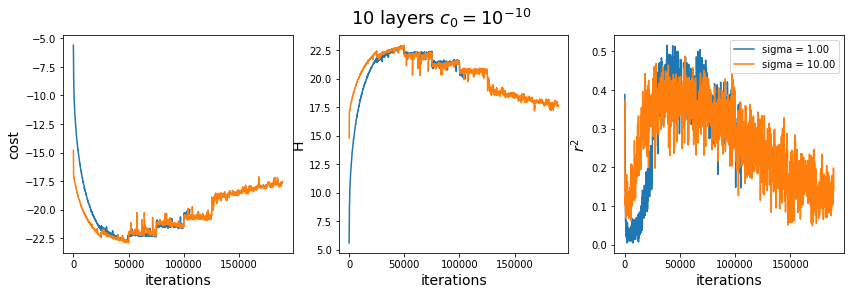

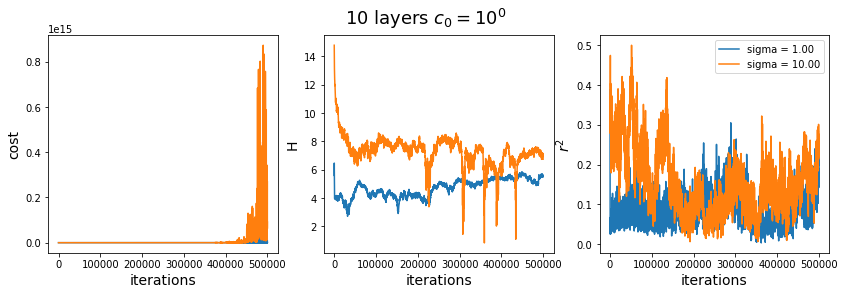

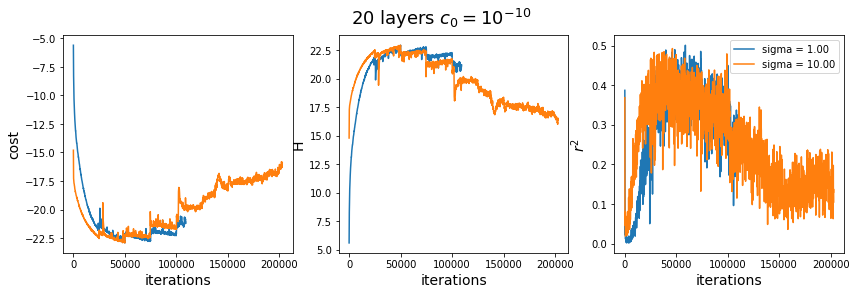

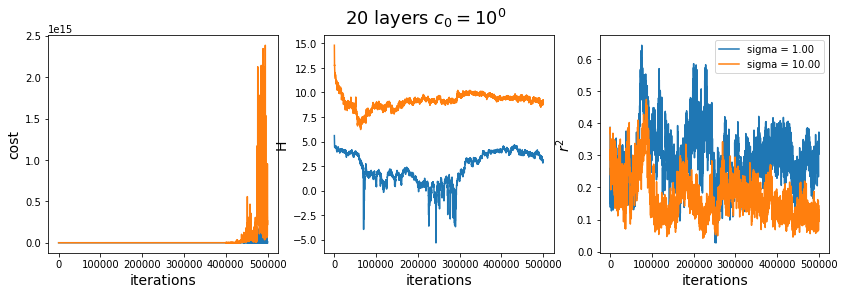

In [3]:
figsize = (14, 4);
fontsize = 14;
random_seed = 0;
basedir = '/Users/sbittner/Documents/dsn/dsn/results/';
dirstr = 'convergence_testing';

for i in range(num_nlayers):
    nlayers = all_nlayers[i];
    for j in range(num_c_inits):
        c_init = c_inits[j];
        plt.figure(figsize=figsize);
        for k in range(num_sigmas):
            sigma = sigmas[k];
            label = 'sigma = %.2f' % sigma;
            
            savedir = basedir + dirstr + '/linear_2D_D=4_T=1_flow=M_%dP_sigma=%.2f_lr_order=-3_c=%d_rs=0/' \
                                                                              % (nlayers, sigma, c_init);
            fname = savedir + 'results.npz';

            npzfile = np.load(fname);
            check_rate = npzfile['check_rate'];
            costs = npzfile['costs'];
            Hs = npzfile['Hs'];
            R2s = npzfile['R2s'];
            mean_T_phis = npzfile['mean_T_phis'];
            mu = npzfile['mu'];
            behavior = npzfile['behavior'];

            phis = npzfile['phis'];
            T_phis = npzfile['T_phis'];
            log_q_phis = npzfile['log_q_phis'];
            last_ind = npzfile['it']//check_rate;
            k_max = phis.shape[0]-1;

            nits = costs.shape[0];
            iterations = np.arange(0, check_rate*nits, check_rate);
            
            plt.subplot(1,3,1);
            plt.plot(iterations[:last_ind], costs[:last_ind], label=label);

            plt.subplot(1,3,2);
            plt.plot(iterations[:last_ind], Hs[:last_ind], label=label);
            
            plt.subplot(1,3,3);
            plt.plot(iterations[:last_ind], R2s[:last_ind], label=label);
            
        plt.subplot(1,3,1);
        plt.xlabel('iterations', fontsize=fontsize);
        plt.ylabel('cost', fontsize=fontsize);
        
        plt.subplot(1,3,2);
        plt.xlabel('iterations', fontsize=fontsize);
        plt.ylabel('H', fontsize=fontsize);
        
        plt.subplot(1,3,3);
        plt.xlabel('iterations', fontsize=fontsize);
        plt.ylabel(r'$r^2$', fontsize=fontsize);
        
        plt.legend();
        
        plt.suptitle(r'%d layers $c_0 = 10^{%d}$' % (nlayers, c_init), fontsize=fontsize+4);
            
        plt.show();


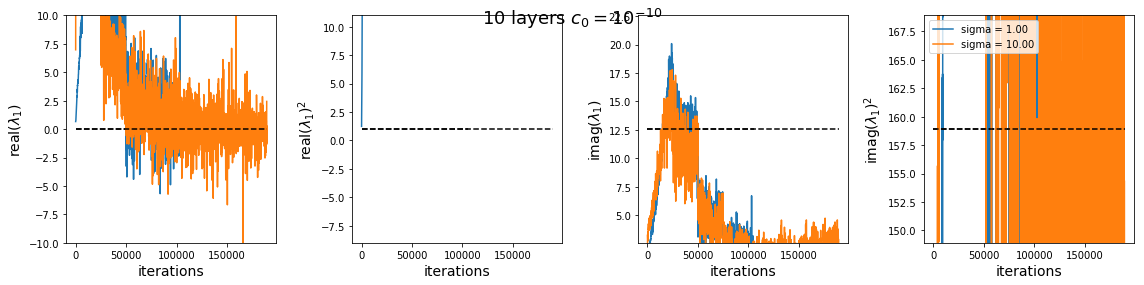

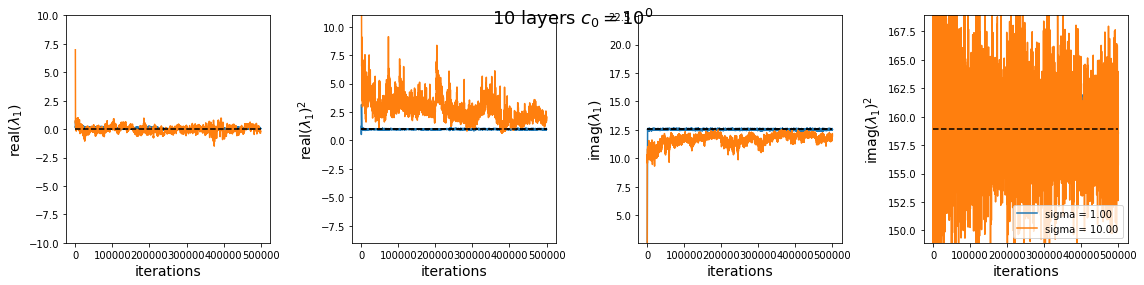

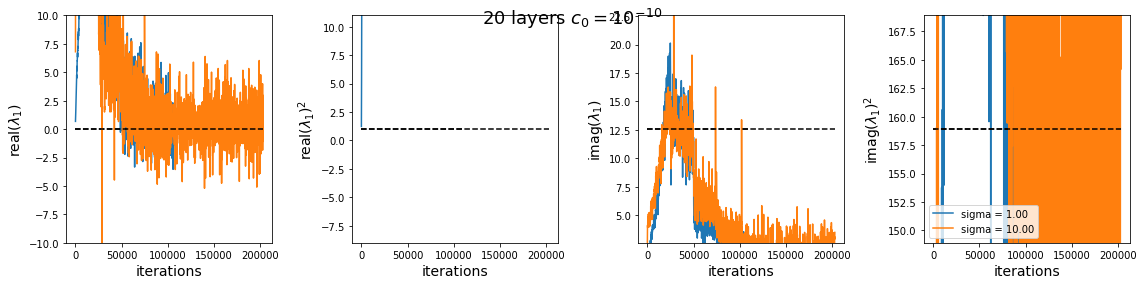

In [4]:
figsize = (16, 4);
constraint_names = [r'real$(\lambda_1)$', r'real$(\lambda_1)^2$', \
                    r'imag$(\lambda_1)$', r'imag$(\lambda_1)^2$'];
buf = [10, 10, 10, 10];
for i in range(num_nlayers):
    nlayers = all_nlayers[i];
    for j in range(num_c_inits):
        c_init = c_inits[j];
        plt.figure(figsize=figsize);
        for k in range(num_sigmas):
            sigma = sigmas[k];
            label = 'sigma = %.2f' % sigma;
            
            savedir = basedir + dirstr + '/linear_2D_D=4_T=1_flow=M_%dP_sigma=%.2f_lr_order=-3_c=%d_rs=0/' \
                                                                              % (nlayers, sigma, c_init);
            fname = savedir + 'results.npz';
            npzfile = np.load(fname);
            
            mean_T_phis = npzfile['mean_T_phis'];
            check_rate = npzfile['check_rate'];
            
            last_ind = npzfile['it']//check_rate;
            num_suff_stats = mean_T_phis.shape[1];
            for i in range(num_suff_stats):
                plt.subplot(1,4,i+1);
                plt.plot(iterations[:last_ind], mean_T_phis[:last_ind,i], label=label);
                plt.plot([iterations[0], iterations[last_ind]], [mu[i], mu[i]], 'k--');
                plt.ylim([mu[i]-buf[i], mu[i]+buf[i]]);
                if (k==0):
                    plt.xlabel('iterations', fontsize=fontsize);
                    plt.ylabel(constraint_names[i], fontsize=fontsize);
        
        plt.legend();
        
        plt.suptitle(r'%d layers $c_0 = 10^{%d}$' % (nlayers, c_init), fontsize=fontsize+4);
        plt.tight_layout();
        
        plt.show();

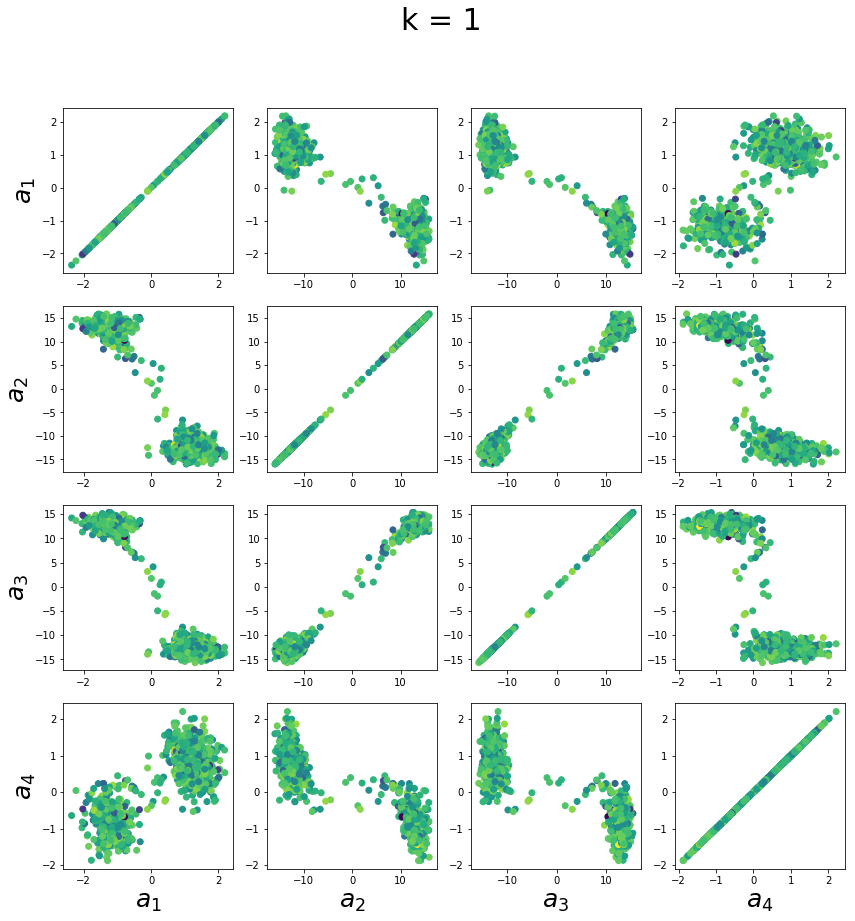

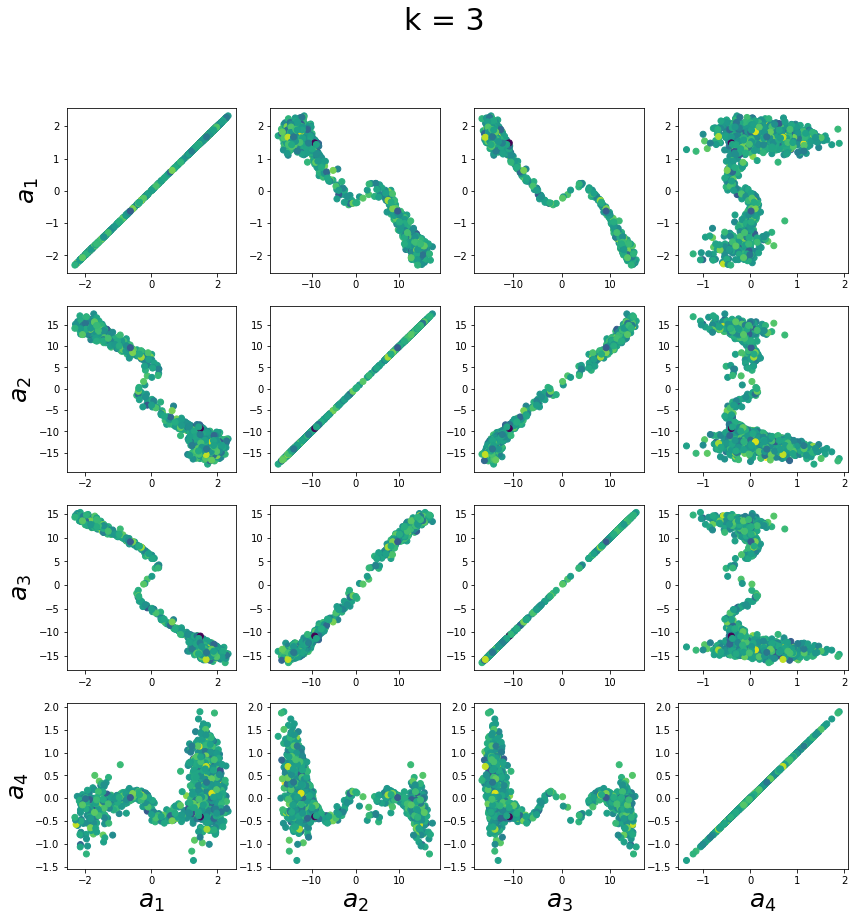

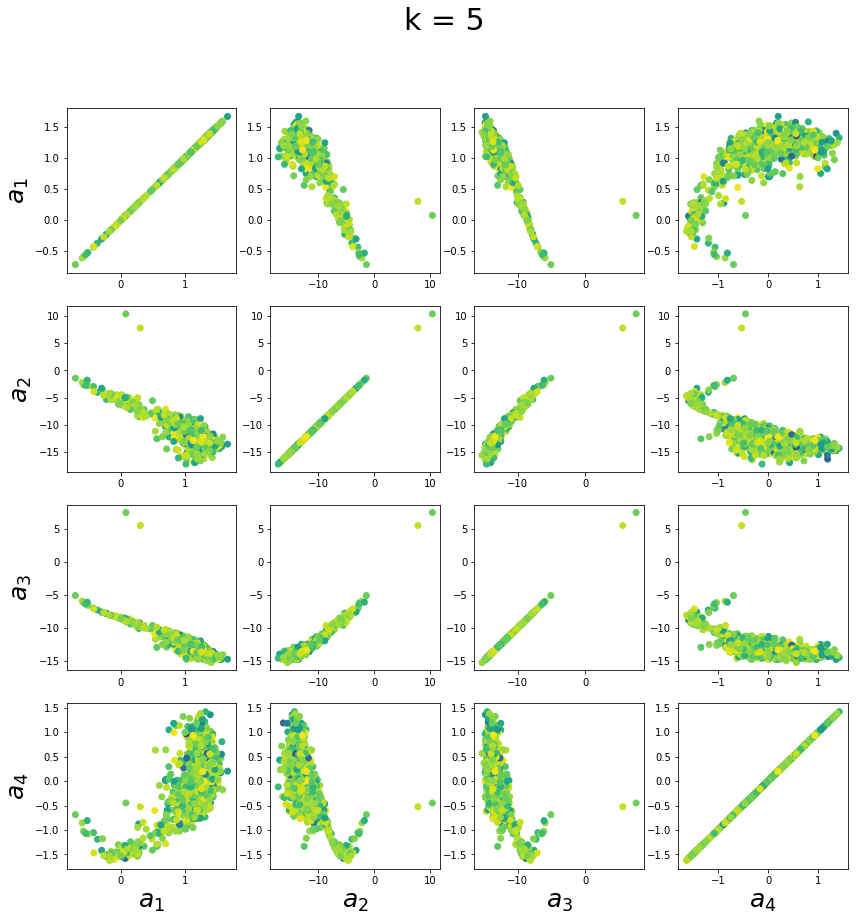

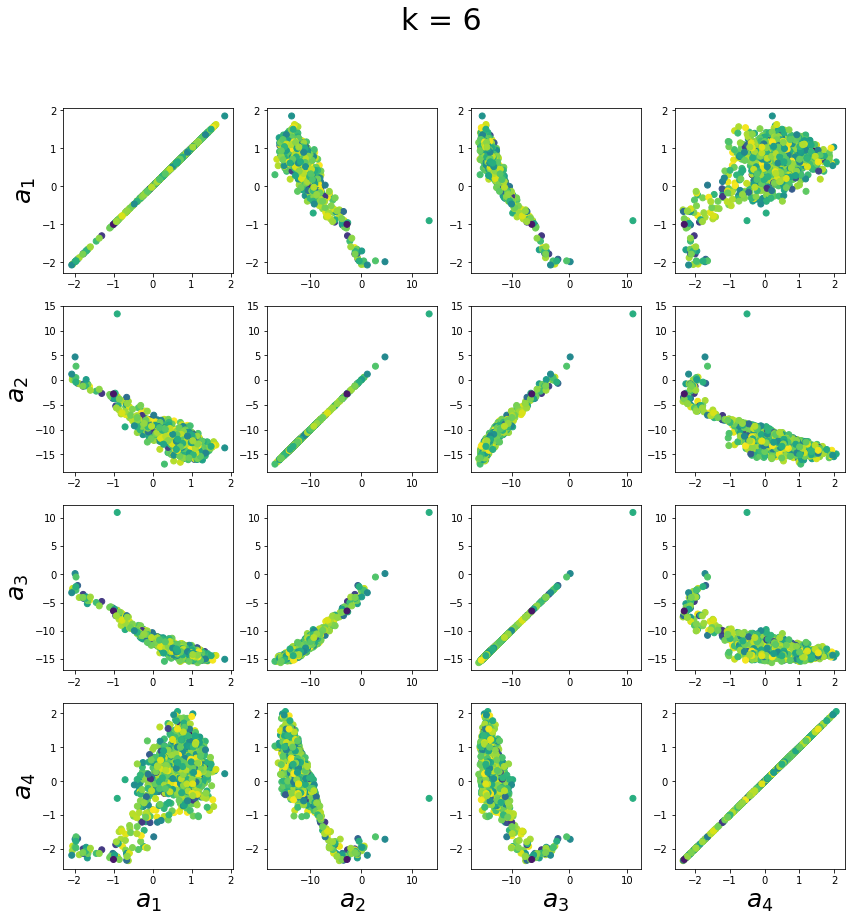

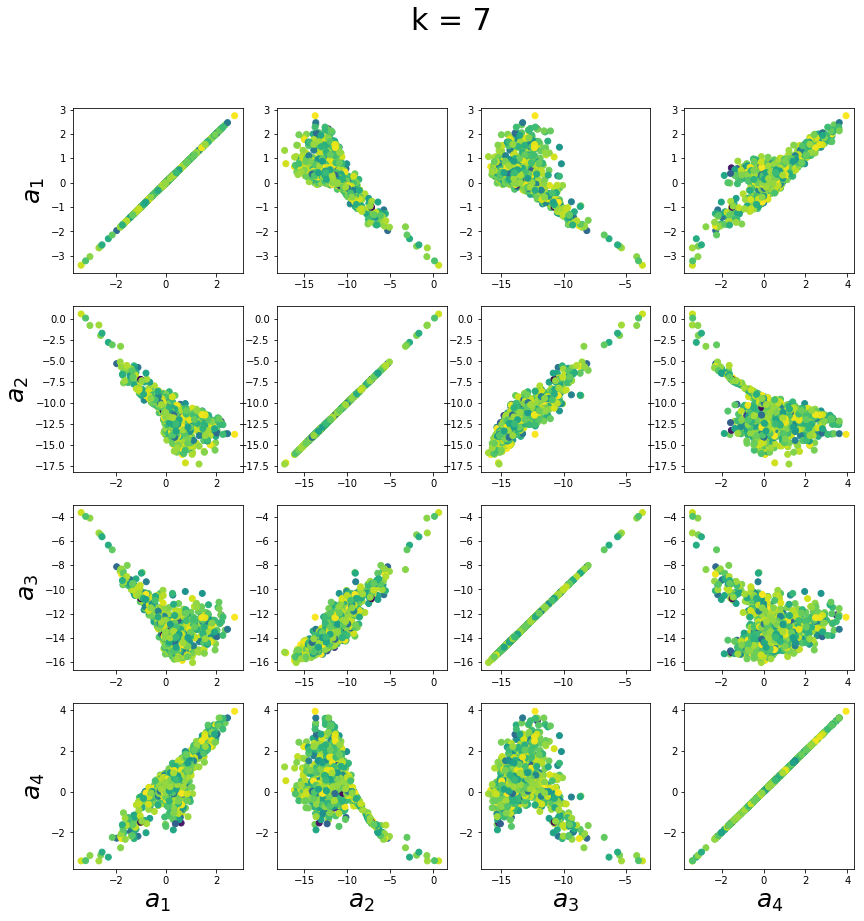

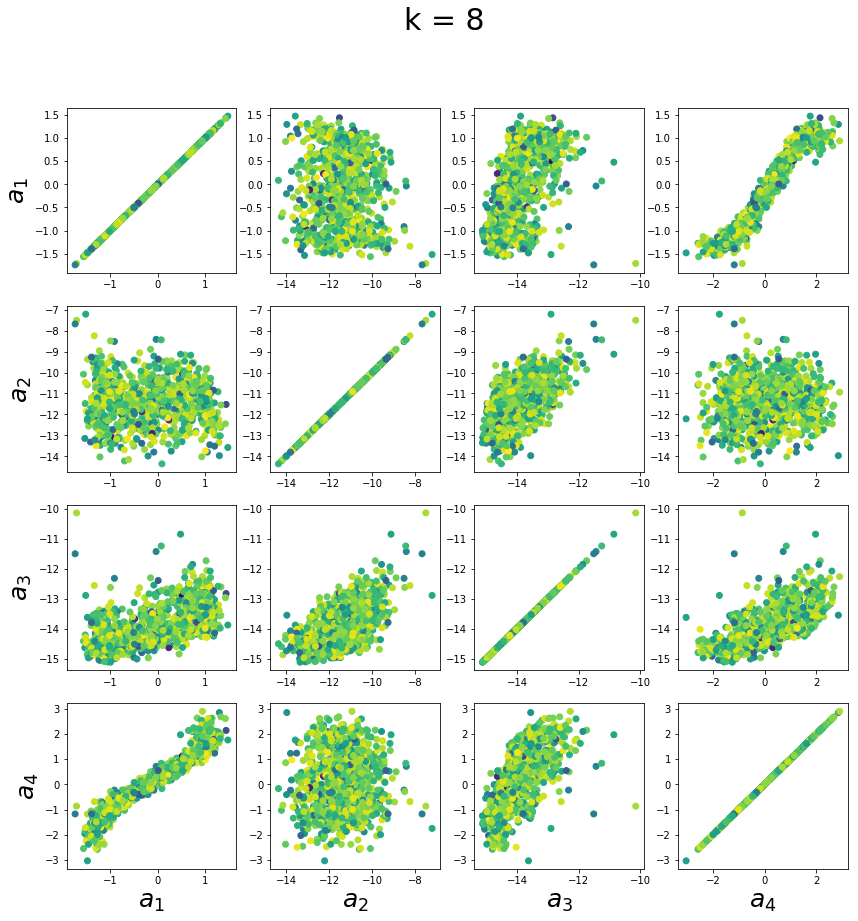

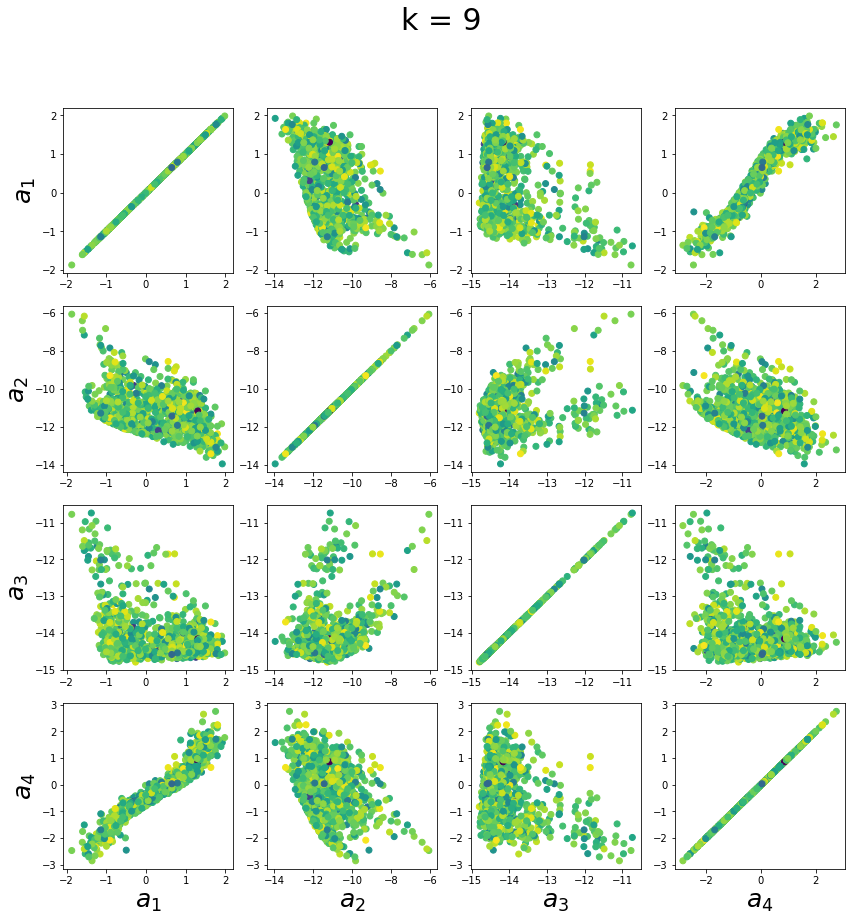

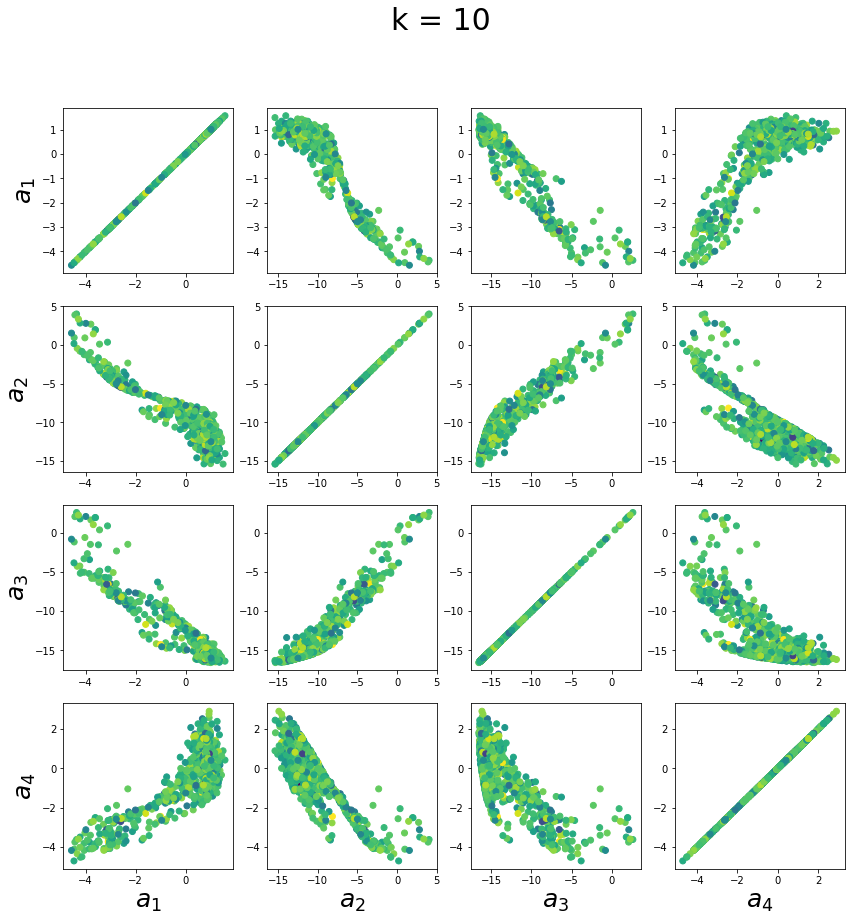

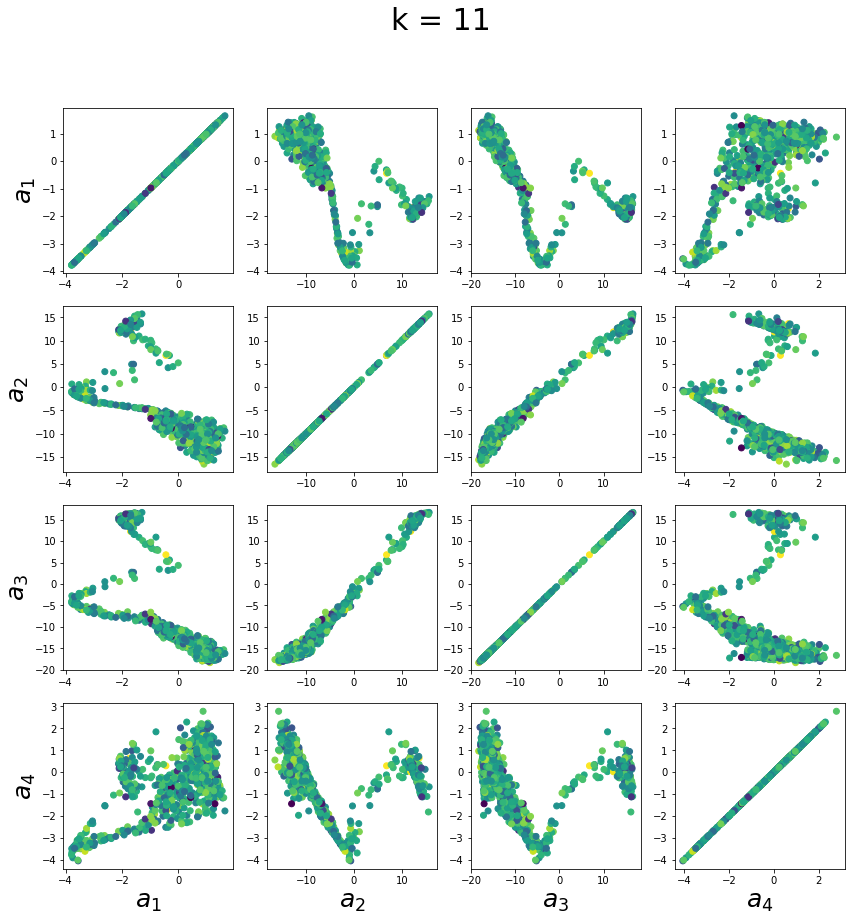

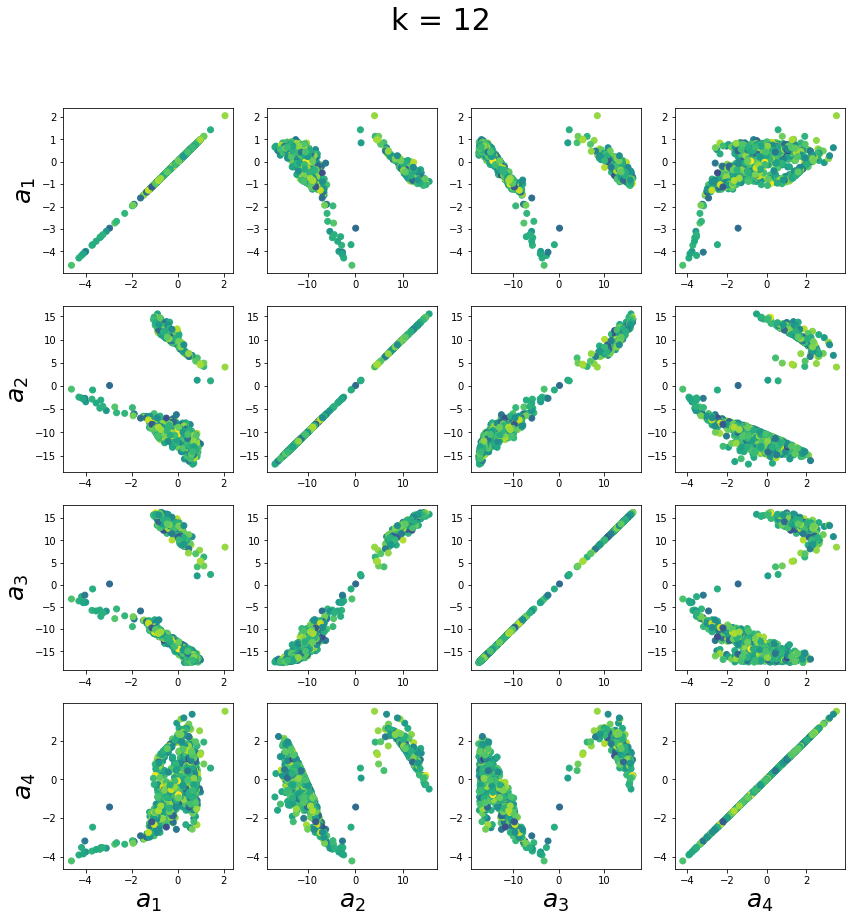

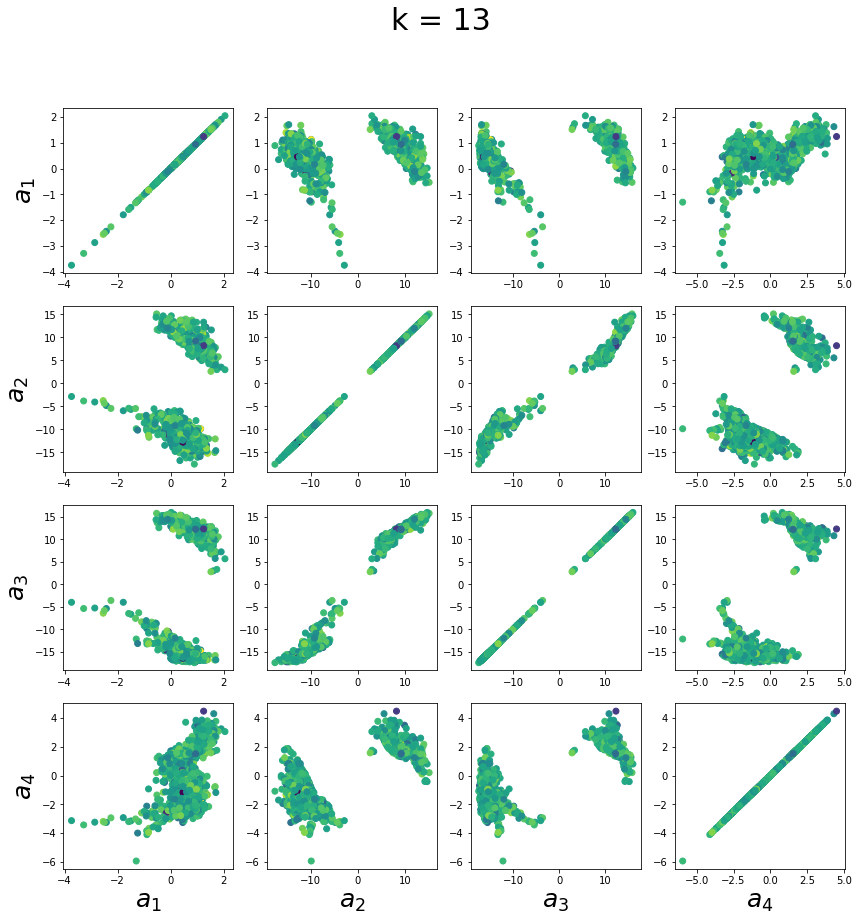

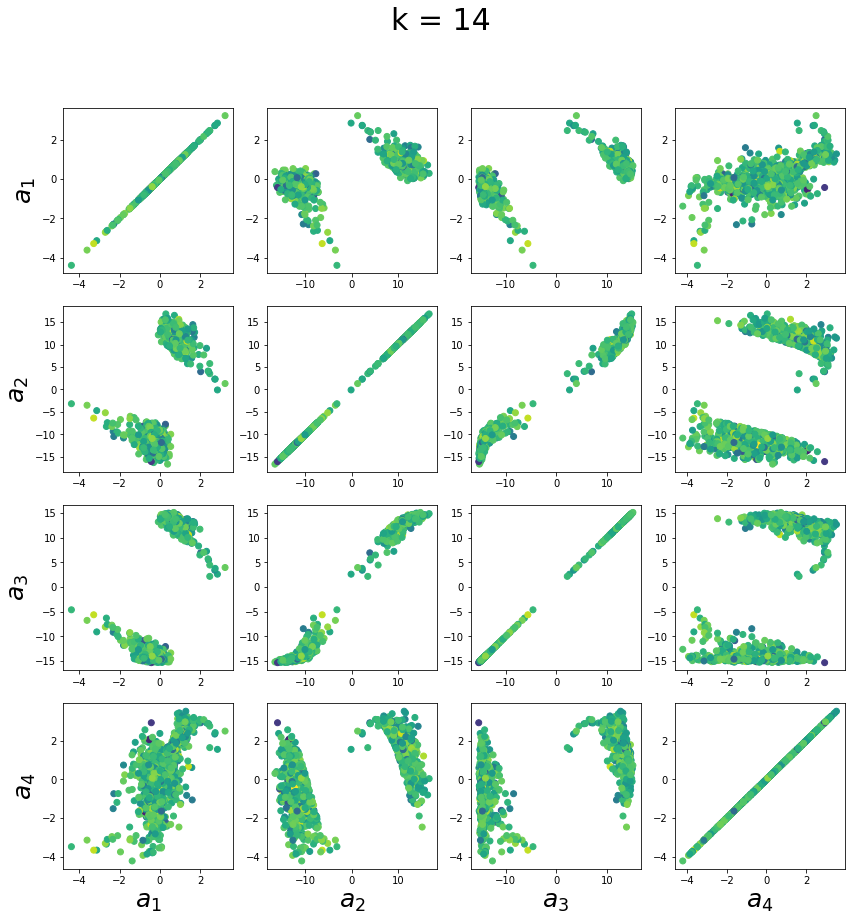

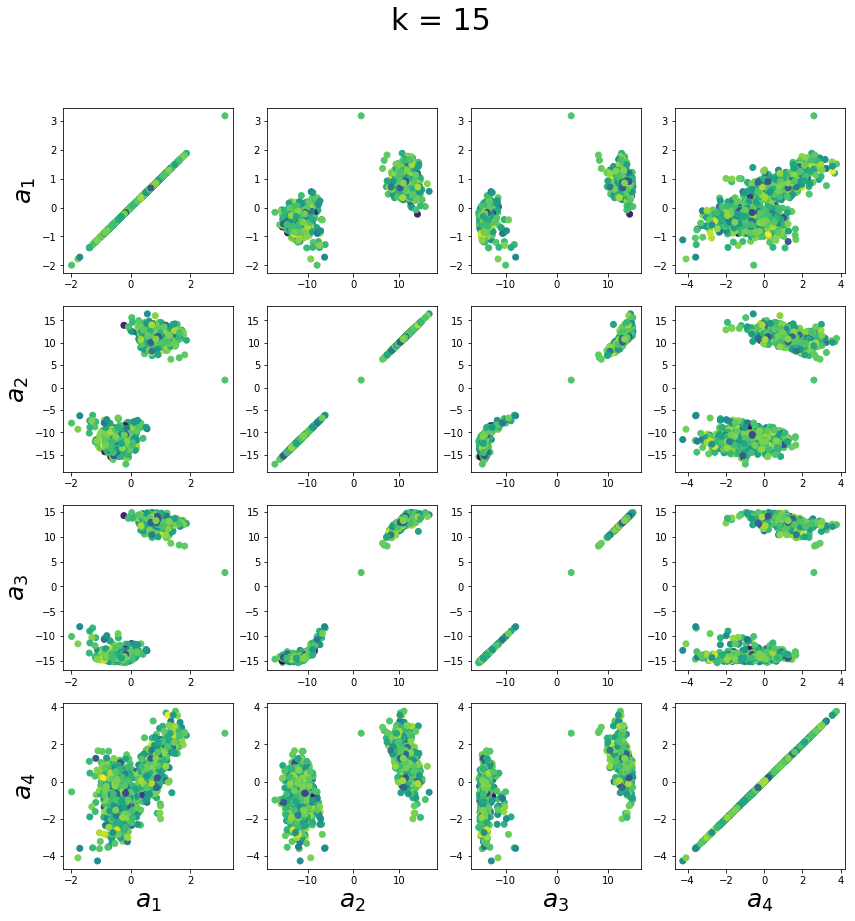

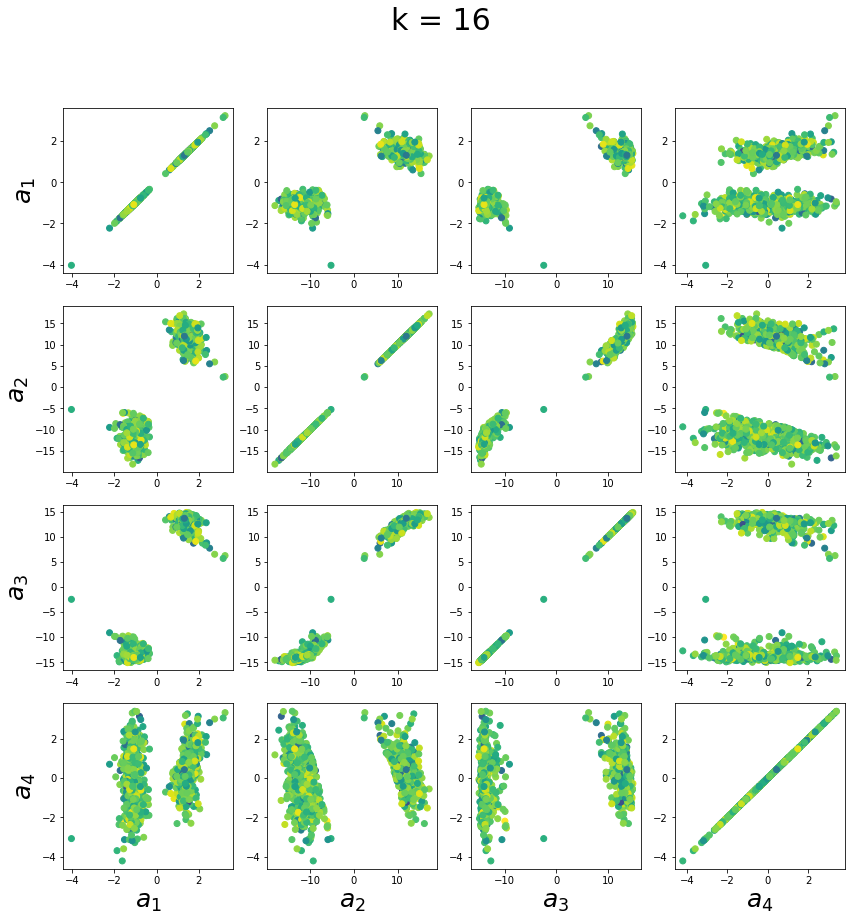

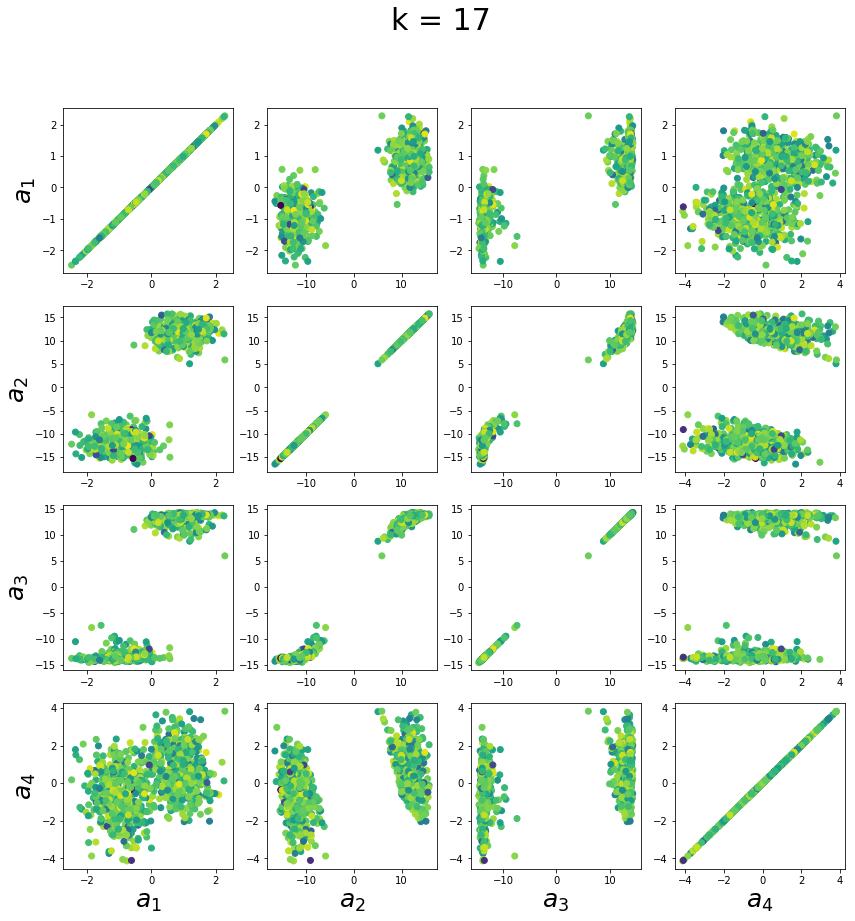

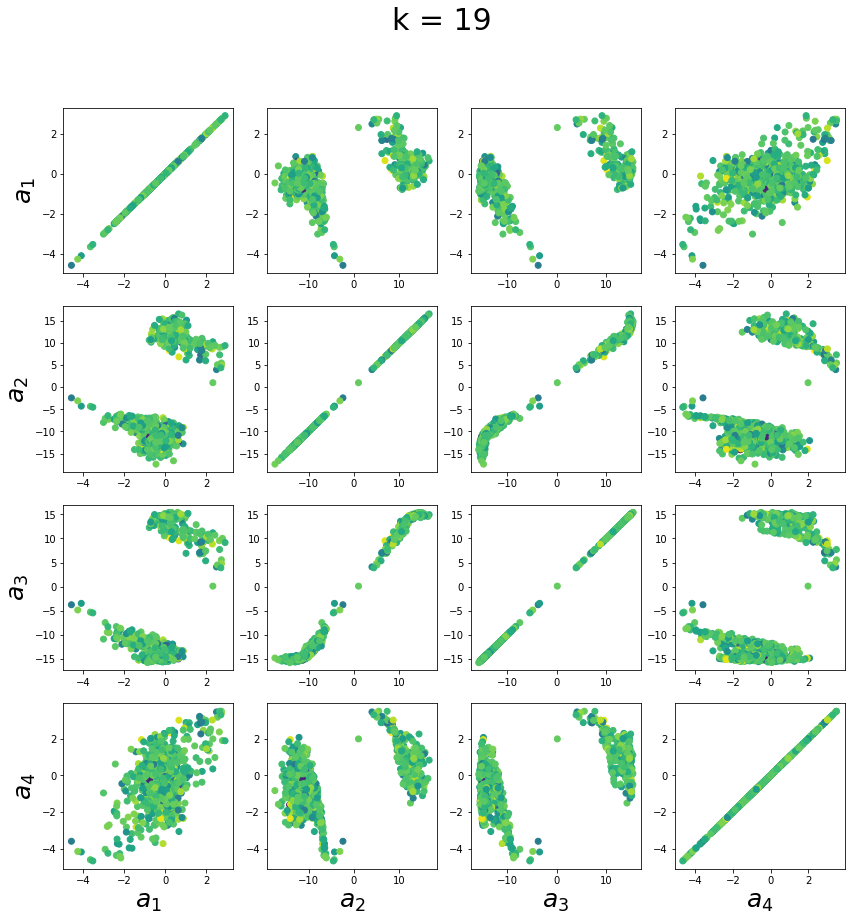

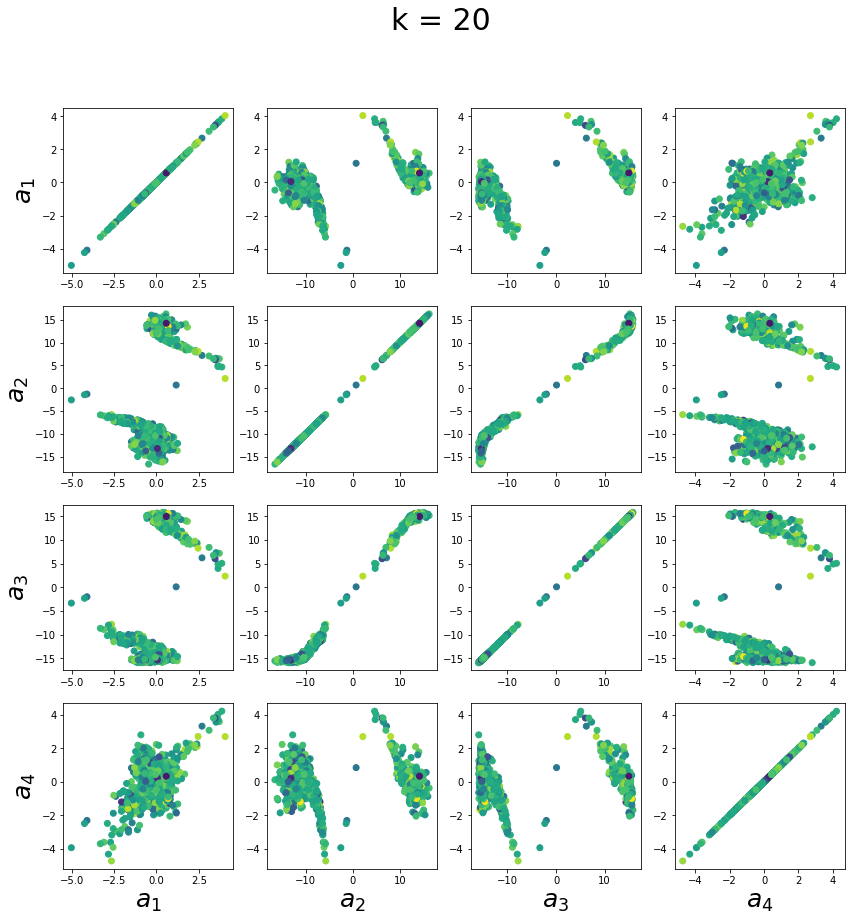

In [5]:
nlayers = 20;
sigma = 1.0;
c_init = 0;

savedir = basedir + dirstr + '/linear_2D_D=4_T=1_flow=M_%dP_sigma=%.2f_lr_order=-3_c=%d_rs=0/' \
                                                                              % (nlayers, sigma, c_init);
fname = savedir + 'results.npz';
npzfile = np.load(fname);

T_phis = npzfile['T_phis'];
phis = npzfile['phis'];
log_q_phis = npzfile['log_q_phis'];

for k in range(k_max+1):
    fontsize = 25;
    figsize = (14, 14);
    plt.figure(figsize=figsize);
    for i in range(system.D):
        for j in range(system.D):
            ind = system.D*i + j + 1;
            plt.subplot(system.D, system.D, ind);
            plt.scatter(phis[k,:,j], phis[k, :, i], c=log_q_phis[k]);
            if (i==3):
                plt.xlabel(r'$a_%d$' % (j+1), fontsize=fontsize);
            if (j==0):
                plt.ylabel(r'$a_%d$' % (i+1), fontsize=fontsize);
    plt.suptitle('k = %d' % k, fontsize=30);

    plt.show();


0.679285042526509 0
1.2337271533456193 0
0.18179516093571924 0
0.16937697324649206 0


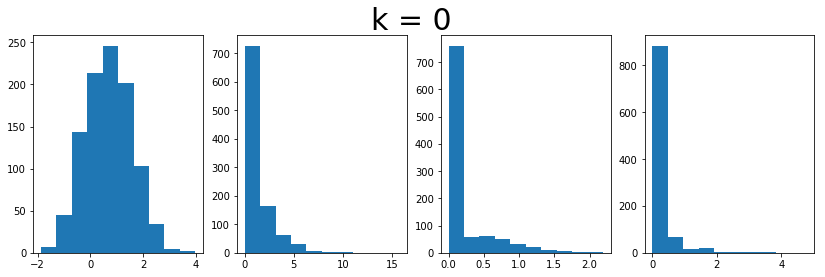

0.22937547027279823 0
1.0585974690150424 0
12.47218774122602 0
157.9258462529917 0


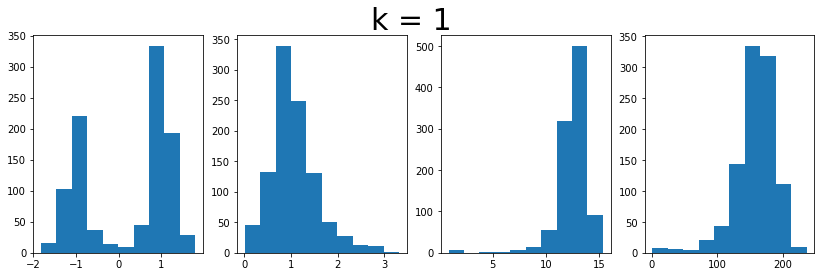

0.23699234081051107 0
0.9810391609539927 0
12.542980093522115 0
159.3695018952066 0


0.41414870315765323 0
0.8775120411872329 0
12.337084181262977 0
159.35679105809476 0


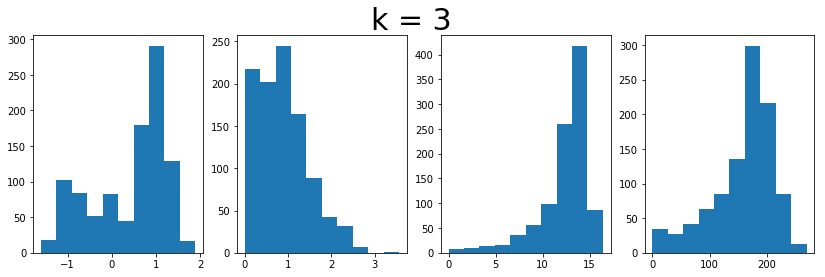

0.6044312819212563 0
0.49075842635543687 0
12.399717618155487 0
160.5622306483938 0


0.5270131365984548 0
0.49511807622810755 0
12.40814469139019 0
158.48251263138044 0


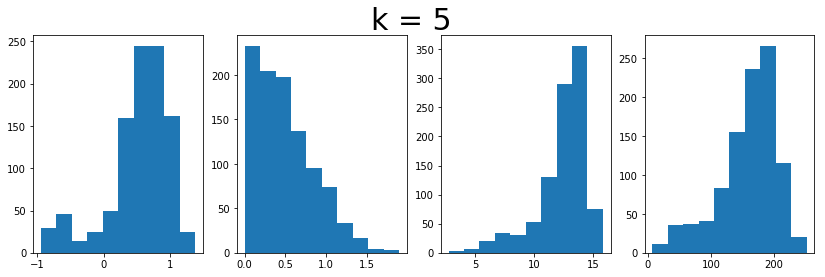

0.43784468325009634 0
0.5850789536606551 0
12.411701912226187 0
160.4732614323928 0


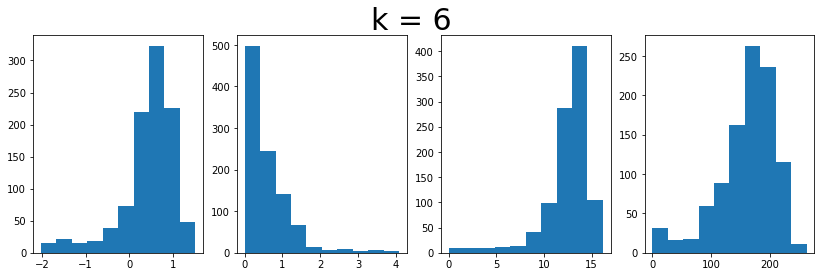

0.2850668988585034 0
0.8202498489160494 0
12.44480113653122 0
158.67023416205072 0


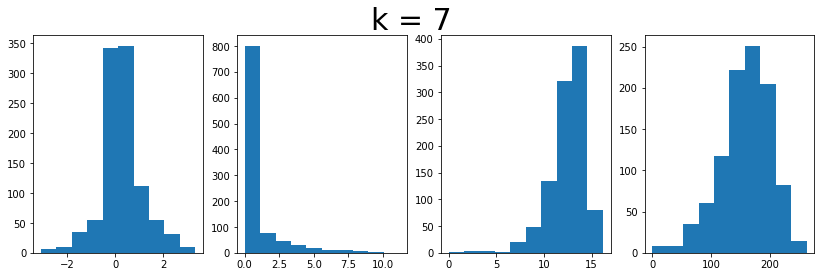

0.015145981184196515 0
1.0014426887734642 0
12.59509393396835 0
159.25371667892932 0


0.04123791807747148 0
0.9817582834026917 0
12.571680488243878 0
158.6185141734527 0


-0.07150243226596655 0
1.7599317129411287 0
12.01354221335632 0
154.703458090968 0


-0.030251369801235793 0
1.3041179346420477 0
11.890276115500557 0
153.66146658482614 0


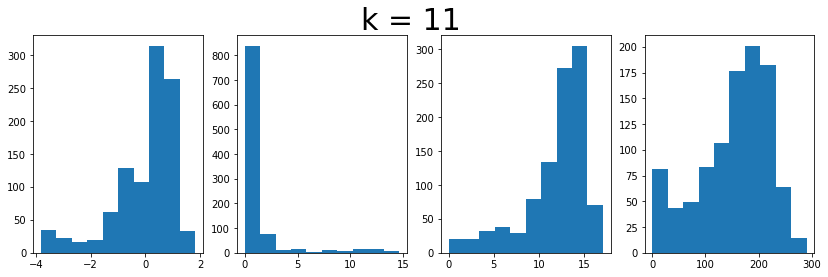

-0.040066427052069364 0
0.9025055940127262 0
12.40134709666444 0
160.82098741565696 0


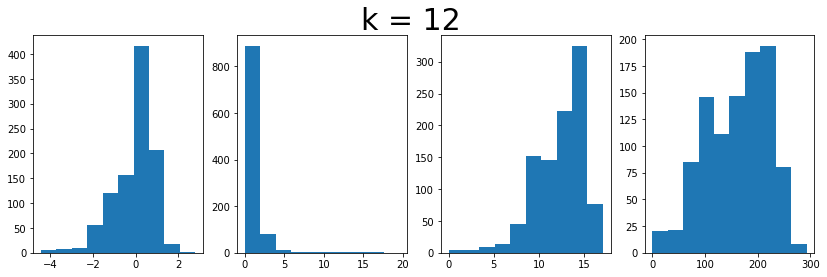

0.19906140000974964 0
1.2044214383268896 0
12.326359255189102 0
158.45272044856642 0


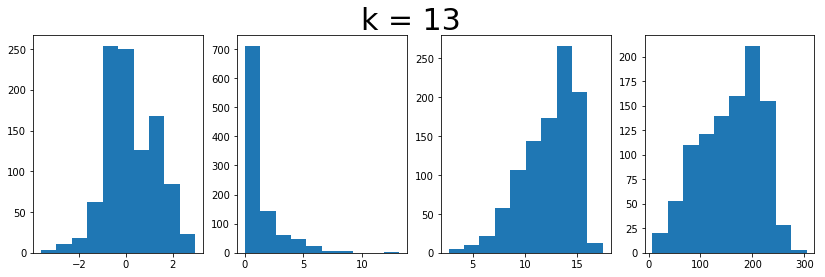

0.0655131743362013 0
1.146639826249499 0
12.56562520888842 0
161.41639728970998 0


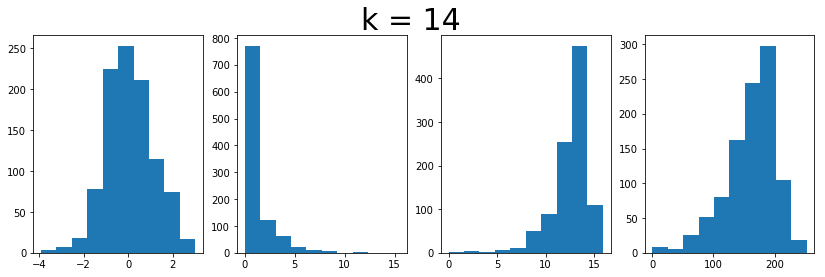

0.021866560033715083 0
0.9751568571640522 0
12.469250272613397 0
157.21055101777876 0


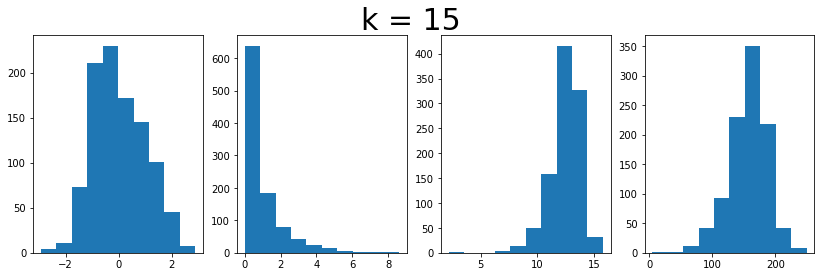

0.06158875225453019 0
0.9979209487218481 0
12.54987675781216 0
159.9281839705761 0


-0.057004207629069575 0
1.0673780166240123 0
12.533356312561754 0
158.67926959891966 0


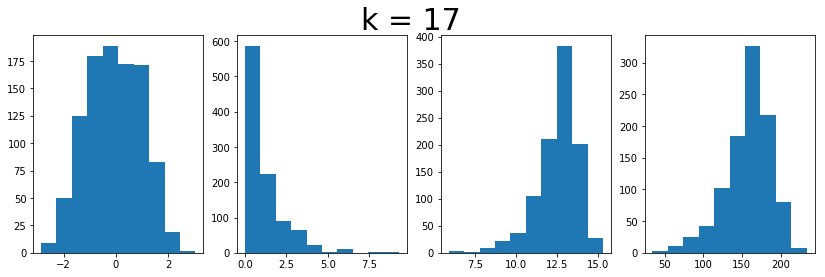

-0.15548215392630407 0
1.0632925233784578 0
12.490775721277714 0
157.95933301432834 0


-0.2624799090541909 0
0.9667896256089111 0
12.34559676555713 0
156.52786724697106 0


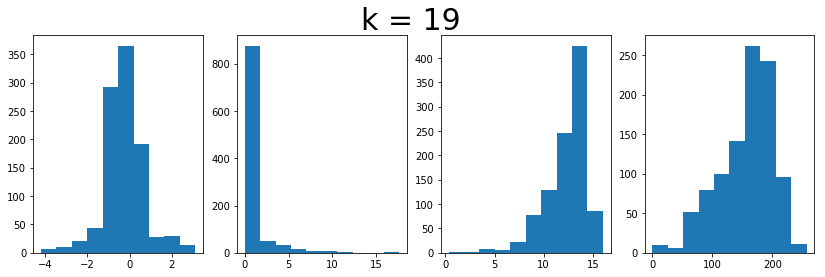

-0.08514267214628066 0
0.6629823657205327 0
12.497264041626572 0
160.52956983650347 0


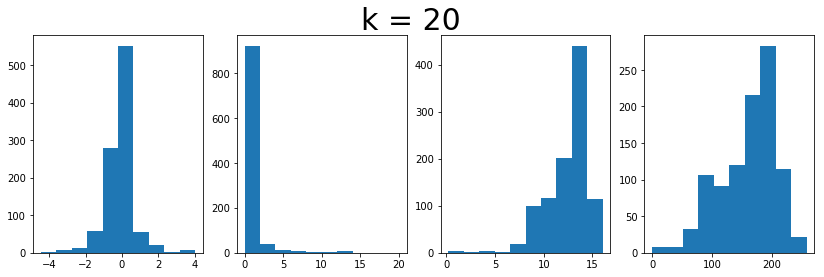

In [6]:
T_phis = npzfile['T_phis'];

for k in range(k_max+1):
    fontsize = 25;
    figsize = (14, 4);
    plt.figure(figsize=figsize);
    for i in range(system.D):
        plt.subplot(1, system.D, i+1);
        plt.hist(T_phis[k,:,i]);
        #for j in range(system.D):
        #    ind = system.D*i + j + 1;
        #    plt.subplot(system.D, system.D, ind);
        #   plt.scatter(T_phis[k,:,j], T_phis[k, :, i], c=log_q_phis[k]);
        #    if (i==3):
        #        plt.xlabel(r'$a_%d$' % (j+1), fontsize=fontsize);
        #    if (j==0):
        #        plt.ylabel(r'$a_%d$' % (i+1), fontsize=fontsize);
        print(np.mean(T_phis[k,:,i]),0);
    plt.suptitle('k = %d' % k, fontsize=30);

    plt.show();
